In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.formula.api import logit
from sklearn  import metrics
import pyarrow.parquet as pq
import pickle
import numpy as np
import time
import seaborn as sns
from itertools import combinations
from statsmodels import graphics
from statsmodels.genmod.families import links
from tqdm import tqdm
import sys
import pandas as pd
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

## Just change the path 

In [3]:
table2 = pq.read_table('E:\\Downloads\\stats-econ-homework\\obs_data.parquet')
base=table2.to_pandas()

In [4]:
base.head()

,id,date,collections_start,days_late,bureau_1,bureau_2,late_payments,collection__end,std_revolving_balance_30,agreement_amount_mean,oustanting_balance_weight_30,oustanting_balance_weight_90,max_installments_balance_90,max_payment_90,sum_limit_request_time_weight_180,loss_balance,avg_late_balance_0_180,email_event_30,count_inbound_call_inbound_30,avg_call_duration_30,avg_installments_balance_30,charges_agreement_mean,ongoing_agreement_amount,asset_late_balance,ongoing_agreement_downpayment,recovery_balance,std_installments_balance_0_90,last_email_engagement,last_chat_engagement,finantial_institutions,downpayment_mean,avg_spends,score_1,score_2,score_3,income_score_1,count_previous_delinquencies,income_score_2,age,mean_previous_delinquencies_amount_weight_180,mean_previous_delinquencies_duration_90,score_max_credit_limit,credit_limit_utilization,sum_spends_360
0,94b47b2c-24ca-4c0b-8a1b-d47b8c6094ce,2017-01-01,2017-01-01,0,0,0,0,2017-02-13,0.0,NaN,69.0,16.0,0.0,540.0,2.0,19.0,23.0,1.0,1.0,0.0,0.0,NaN,NaN,20.0,NaN,2.0,0.0,NaN,16.0,1.0,NaN,NaN,635.0,22.0,30.0,2221.0,3.0,1624.0,39.0,19.0,6.0,1128.0,1.0,196.0
1,ee254bce-3eec-46cd-a440-826631a44783,2017-01-01,2017-01-01,0,0,0,40,2017-06-14,0.0,NaN,55.0,1.0,0.0,18.0,1.0,33.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,162.0,NaN,4.0,NaN,NaN,342.0,214.0,323.0,1012.0,1.0,15828.0,45.0,3.0,0.0,2111.0,1.0,18.0
2,74a49cd6-44f8-41cc-926b-b324794f6837,2017-01-01,2017-01-01,0,0,0,0,2017-02-03,3.0,NaN,1635.0,15.0,0.0,58.0,0.0,111.0,93.0,0.0,0.0,2.0,1.0,NaN,NaN,71.0,NaN,0.0,0.0,NaN,NaN,5.0,NaN,38.0,149.0,104.0,149.0,3958.0,5.0,7801.0,48.0,19.0,3.0,835.0,1.0,0.0
3,e4552188-6002-44f4-b539-1043cf1dd057,2017-01-01,2017-01-01,0,0,0,0,2017-03-01,9.0,NaN,2.0,9.0,0.0,0.0,1.0,0.0,233.0,1.0,1.0,8.0,3.0,NaN,NaN,54.0,NaN,0.0,0.0,54.0,NaN,1.0,NaN,NaN,389.0,58.0,119.0,1624.0,4.0,3786.0,40.0,142.0,17.0,2148.0,1.0,43.0
4,d3005d9c-2d58-4986-9007-67a6758dd7ef,2017-01-01,2017-01-01,0,0,0,0,2017-02-15,1.0,NaN,24.0,3.0,0.0,33240.0,2.0,42.0,1.0,1.0,1.0,2.0,0.0,NaN,NaN,7.0,NaN,1.0,0.0,NaN,19.0,2.0,NaN,NaN,787.0,98.0,134.0,900.0,1.0,4691.0,35.0,1.0,6.0,2690.0,1.0,10.0


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53939 entries, 0 to 53938
Data columns (total 44 columns):
id                                               53939 non-null object
date                                             53939 non-null datetime64[ns]
collections_start                                53939 non-null datetime64[ns]
days_late                                        53939 non-null int64
bureau_1                                         53939 non-null int64
bureau_2                                         53939 non-null int64
late_payments                                    53939 non-null int64
collection__end                                  32062 non-null datetime64[ns]
std_revolving_balance_30                         53939 non-null float64
agreement_amount_mean                            8615 non-null float64
oustanting_balance_weight_30                     53939 non-null float64
oustanting_balance_weight_90                     53939 non-null float64
max_installments

In [6]:
base.describe()

,days_late,bureau_1,bureau_2,late_payments,std_revolving_balance_30,agreement_amount_mean,oustanting_balance_weight_30,oustanting_balance_weight_90,max_installments_balance_90,max_payment_90,sum_limit_request_time_weight_180,loss_balance,avg_late_balance_0_180,email_event_30,count_inbound_call_inbound_30,avg_call_duration_30,avg_installments_balance_30,charges_agreement_mean,ongoing_agreement_amount,asset_late_balance,ongoing_agreement_downpayment,recovery_balance,std_installments_balance_0_90,last_email_engagement,last_chat_engagement,finantial_institutions,downpayment_mean,avg_spends,score_1,score_2,score_3,income_score_1,count_previous_delinquencies,income_score_2,age,mean_previous_delinquencies_amount_weight_180,mean_previous_delinquencies_duration_90,score_max_credit_limit,credit_limit_utilization,sum_spends_360
count,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,8615.000000,53939.000000,53939.00000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,8615.000000,2805.000000,53939.000000,2805.000000,53939.000000,53939.000000,29743.000000,27306.000000,53939.000000,8615.000000,18405.000000,53748.000000,53748.000000,53748.000000,53148.000000,53939.000000,53929.000000,53939.000000,53939.000000,53939.00000,53939.000000,53939.000000,53939.000000
mean,36.569328,0.008139,0.007879,11.509298,7.313094,1850.127104,278.680343,10.69117,11.636274,4160.861343,1.015740,531.582695,364.790245,0.567104,0.889412,2.242607,3.048851,7.209286,1786.373975,994.699568,295.381105,1.523109,5.993604,249.280839,146.428441,2.349228,374.941149,153.452323,569.106888,98.223041,157.192603,2007.253631,3.499564,4241.149604,41.168171,607.368323,11.30338,2252.656964,0.943232,206.534511
std,29.209864,0.089848,0.088416,21.098107,16.114278,1336.698371,1177.434203,16.77419,44.168598,6566.433172,0.250759,3882.446475,801.419988,0.495481,0.313624,2.525473,6.640371,6.087700,1312.558357,4313.561069,181.417646,1.497721,17.041722,265.343450,287.430953,2.116795,292.512281,224.118093,311.186577,109.960037,162.498358,1415.893616,2.457865,4927.987435,9.071001,2687.838813,22.12957,1938.205017,0.552118,1378.392582
min,0.000000,0.000000,0.000000,0.000000,-1.000000,261.000000,-39.000000,0.00000,0.000000,-755.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,273.000000,-74.000000,35.000000,0.000000,0.000000,8.000000,6.000000,0.000000,28.000000,2.000000,96.000000,2.000000,3.000000,124.000000,0.000000,118.000000,19.000000,-300.000000,0.00000,192.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,3.000000,993.000000,40.000000,2.00000,1.000000,877.000000,1.000000,23.000000,111.000000,0.000000,1.000000,1.000000,1.000000,3.000000,969.000000,6.000000,171.000000,1.000000,0.000000,95.000000,73.000000,1.000000,178.000000,39.000000,357.000000,33.000000,56.000000,1079.000000,2.000000,1382.000000,35.000000,65.000000,1.00000,1058.000000,1.000000,1.000000
50%,30.000000,0.000000,0.000000,0.000000,4.000000,1451.000000,91.000000,5.00000,2.000000,2195.000000,1.000000,32.000000,129.000000,1.000000,1.000000,2.000000,1.000000,5.000000,1381.000000,64.000000,239.000000,1.000000,1.000000,171.000000,100.000000,2.000000,270.000000,89.000000,494.000000,65.000000,108.000000,1627.000000,3.000000,2490.000000,40.000000,87.000000,4.00000,1732.000000,1.000000,7.000000
75%,53.000000,0.000000,0.000000,10.000000,7.000000,2294.000000,206.000000,11.00000,6.000000,4810.000000,1.000000,99.000000,334.000000,1.000000,1.000000,3.000000,3.000000,9.000000,2207.000000,323.000000,361.000000,2.000000,4.000000,298.000000,143.000000,3.000000,480.000000,188.000000,699.000000,118.000000,200.000000,2513.000000,5.000000,5249.000000,46.000000,423.000000,11.00000,2766.000000,1.000000,43.000000
max,165.000000,1.000000,1.000000,620.000000,566.000000,9471.000000,38632.000000,183.00000,1029.000000,93248.000000,4.000000,80193.000000,19486.000000,1.000000,1.000000,61.000000,117.000000,57.000000,8764.000000,66316.00000

In [7]:
base[base['bureau_1']==1].head()

,id,date,collections_start,days_late,bureau_1,bureau_2,late_payments,collection__end,std_revolving_balance_30,agreement_amount_mean,oustanting_balance_weight_30,oustanting_balance_weight_90,max_installments_balance_90,max_payment_90,sum_limit_request_time_weight_180,loss_balance,avg_late_balance_0_180,email_event_30,count_inbound_call_inbound_30,avg_call_duration_30,avg_installments_balance_30,charges_agreement_mean,ongoing_agreement_amount,asset_late_balance,ongoing_agreement_downpayment,recovery_balance,std_installments_balance_0_90,last_email_engagement,last_chat_engagement,finantial_institutions,downpayment_mean,avg_spends,score_1,score_2,score_3,income_score_1,count_previous_delinquencies,income_score_2,age,mean_previous_delinquencies_amount_weight_180,mean_previous_delinquencies_duration_90,score_max_credit_limit,credit_limit_utilization,sum_spends_360
804,ee254bce-3eec-46cd-a440-826631a44783,2017-01-16,2017-01-01,15,1,0,0,2017-06-14,0.0,NaN,127.0,2.0,0.0,18.0,1.0,33.0,28.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,NaN,65.0,4.0,NaN,176.0,342.0,214.0,323.0,1012.0,1.0,15828.0,45.0,3.0,0.0,2111.0,1.0,18.0
845,e4552188-6002-44f4-b539-1043cf1dd057,2017-01-16,2017-01-01,15,1,0,50,2017-03-01,9.0,NaN,40.0,13.0,0.0,0.0,1.0,0.0,158.0,1.0,1.0,8.0,3.0,NaN,NaN,54.0,NaN,0.0,0.0,54.0,NaN,1.0,NaN,140.0,389.0,58.0,119.0,1624.0,4.0,3786.0,40.0,142.0,17.0,2148.0,1.0,43.0
873,f84bc28e-7298-4d59-a315-5a3c1125f820,2017-01-16,2017-01-01,15,1,0,30,NaT,0.0,1587.0,32.0,12.0,4.0,29579.0,1.0,0.0,178.0,0.0,1.0,2.0,0.0,5.0,NaN,102.0,NaN,2.0,3.0,97.0,NaN,1.0,265.0,NaN,856.0,28.0,42.0,1951.0,2.0,3301.0,43.0,296.0,10.0,1562.0,2.0,140.0
880,40249e57-7de1-42fb-9201-afab1a3965a4,2017-01-16,2017-01-01,15,1,0,20,2017-02-18,2.0,NaN,17.0,51.0,0.0,0.0,2.0,0.0,2824.0,0.0,1.0,14.0,1.0,NaN,NaN,16662.0,NaN,0.0,0.0,79.0,NaN,1.0,NaN,165.0,1211.0,14.0,22.0,3253.0,1.0,951.0,38.0,7637.0,63.0,4323.0,3.0,4293.0
898,abd31cd5-ccc6-415c-9c76-124a01f6c898,2017-01-17,2017-01-02,15,1,0,0,2017-03-31,0.0,NaN,50.0,10.0,0.0,879.0,1.0,4.0,441.0,1.0,1.0,2.0,0.0,NaN,NaN,110.0,NaN,2.0,0.0,58.0,37.0,0.0,NaN,67.0,523.0,47.0,66.0,1724.0,9.0,15113.0,38.0,349.0,14.0,3026.0,1.0,46.0


In [8]:
base[base['bureau_2']==1].head()

,id,date,collections_start,days_late,bureau_1,bureau_2,late_payments,collection__end,std_revolving_balance_30,agreement_amount_mean,oustanting_balance_weight_30,oustanting_balance_weight_90,max_installments_balance_90,max_payment_90,sum_limit_request_time_weight_180,loss_balance,avg_late_balance_0_180,email_event_30,count_inbound_call_inbound_30,avg_call_duration_30,avg_installments_balance_30,charges_agreement_mean,ongoing_agreement_amount,asset_late_balance,ongoing_agreement_downpayment,recovery_balance,std_installments_balance_0_90,last_email_engagement,last_chat_engagement,finantial_institutions,downpayment_mean,avg_spends,score_1,score_2,score_3,income_score_1,count_previous_delinquencies,income_score_2,age,mean_previous_delinquencies_amount_weight_180,mean_previous_delinquencies_duration_90,score_max_credit_limit,credit_limit_utilization,sum_spends_360
1053,e4552188-6002-44f4-b539-1043cf1dd057,2017-01-18,2017-01-01,17,0,1,0,2017-03-01,9.0,NaN,40.0,13.0,0.0,0.0,1.0,0.0,158.0,1.0,1.0,8.0,3.0,NaN,NaN,54.0,NaN,0.0,0.0,NaN,NaN,1.0,NaN,140.0,389.0,58.0,119.0,1624.0,4.0,3786.0,40.0,142.0,17.0,2148.0,1.0,43.0
1068,d3005d9c-2d58-4986-9007-67a6758dd7ef,2017-01-18,2017-01-01,17,0,1,0,2017-02-15,1.0,NaN,117.0,7.0,0.0,33240.0,2.0,42.0,43.0,1.0,1.0,2.0,0.0,NaN,NaN,7.0,NaN,1.0,0.0,149.0,30.0,2.0,NaN,NaN,787.0,98.0,134.0,900.0,1.0,4691.0,35.0,1.0,6.0,2690.0,1.0,10.0
1090,40249e57-7de1-42fb-9201-afab1a3965a4,2017-01-18,2017-01-01,17,0,1,0,2017-02-18,2.0,NaN,17.0,51.0,0.0,0.0,2.0,0.0,2824.0,0.0,1.0,14.0,1.0,NaN,NaN,16662.0,NaN,0.0,0.0,NaN,31.0,1.0,NaN,165.0,1211.0,14.0,22.0,3253.0,1.0,951.0,38.0,7637.0,63.0,4323.0,3.0,4293.0
1107,abd31cd5-ccc6-415c-9c76-124a01f6c898,2017-01-19,2017-01-02,17,0,1,0,2017-03-31,0.0,2895.0,50.0,10.0,0.0,879.0,1.0,4.0,441.0,1.0,1.0,2.0,0.0,21.0,NaN,110.0,NaN,2.0,0.0,58.0,37.0,0.0,153.0,NaN,523.0,47.0,66.0,1724.0,9.0,15113.0,38.0,349.0,14.0,3026.0,1.0,46.0
1153,d504d6a1-1f80-4836-9c04-75f4acfbeea4,2017-01-19,2017-01-02,17,0,1,0,2017-04-24,1.0,NaN,110.0,3.0,0.0,162.0,1.0,167.0,21.0,1.0,1.0,2.0,0.0,NaN,NaN,5.0,NaN,7.0,0.0,NaN,164.0,1.0,NaN,134.0,884.0,47.0,135.0,1702.0,3.0,1859.0,37.0,22.0,0.0,667.0,1.0,26.0


## Validating the days bureaus_1 and 2 happen

In [9]:
base.groupby(['bureau_1','bureau_2']).mean()

days_late  late_payments  std_revolving_balance_30  \
bureau_1 bureau_2                                                       
0        0         36.904437      11.457748                  7.288780   
         1         17.000000      11.835294                  8.680000   
1        0         15.000000      17.425968                  8.929385   

                   agreement_amount_mean  oustanting_balance_weight_30  \
bureau_1 bureau_2                                                        
0        0                   1845.482665                    279.156835   
         1                   1900.312500                    222.395294   
1        0                   2359.605634                    275.562642   

                   oustanting_balance_weight_90  max_installments_balance_90  \
bureau_1 bureau_2                                                              
0        0                            10.645765                    11.580236   
         1                            14.611765                    15.750588   
1        0                            12.384966                    14.428246   

                   max_payment_90  sum_limit_request_time_weight_180  \
bureau_1 bureau_2                                                      
0        0            4148.699651                           1.015506   
         1            5011.247059                           1.030588   
1        0            4807.940774                           1.029613   

                   loss_balance  avg_late_balance_0_180  email_event_30  \
bureau_1 bureau_2                                                         
0        0           534.937070              362.971493        0.566802   
         1           257.868235              510.832941        0.588235   
1        0           391.025057              443.291572        0.583144   

                   count_inbound_call_inbound_30  avg_call_duration_30  \
bureau_1 bureau_2                                                        
0        0                              0.890061              2.238210   
         1                              0.856471              2.602353   
1        0                              0.842825              2.425968   

                   avg_installments_balance_30  charges_agreement_mean  \
bureau_1 bureau_2                                                        
0        0                            3.041564                7.195991   
         1                            3.720000                7.000000   
1        0                            3.280182                8.985915   

                   ongoing_agreement_amount  asset_late_balance  \
bureau_1 bureau_2                                                 
0        0                      1779.446014          986.901441   
         1                      2528.727273         1488.063529   
1        0                      1907.652174         1459.861048   

                   ongoing_agreement_downpayment  recovery_balance  \
bureau_1 bureau_2                                                    
0        0                            294.529710          1.525294   
         1                            418.409091          1.407059   
1        0                            279.869565          1.371298   

                   std_installments_balance_0_90  last_email_engagement  \
bureau_1 bureau_2                                                         
0        0                              5.971192             249.563882   
         1                              7.644706             235.883117   
1        0                              7.104784             228.275304   

                   last_chat_engagement  finantial_institutions  \
bureau_1 bureau_2                                                 
0        0                   146.847967                2.347376   
         1                   112.973094                2.536471   
1        0                   129.660793                2.391800   

   

### Creates Flags for each type of observation

In [10]:
bureau_1=base[base['bureau_1']==1]['id'].unique()
bureau_2=base[base['bureau_2']==1]['id'].unique()


control=list((set(base['id'])-set(bureau_1))-set(bureau_2))
both=set(bureau_1) & set(bureau_2)
treatment1=set(bureau_1) - set(bureau_2)
treatment2=set(bureau_2) - set(bureau_1)


In [11]:
base.loc[base['id'].isin(control),'type_obs']='control'
base.loc[base['id'].isin(both),'type_obs']='both'
base.loc[base['id'].isin(treatment1),'type_obs']='bureau_1'
base.loc[base['id'].isin(treatment2),'type_obs']='bureau_2'


In [12]:
min_date_obs=base.groupby('id')['date'].idxmin().reset_index()

### Type Distribution

In [13]:
base.iloc[min_date_obs['date']]['type_obs'].value_counts()

control     351
bureau_1    224
both        215
bureau_2    210
Name: type_obs, dtype: int64

### Creates Markers to help keep track of the observations in time

In [14]:
base['collection_time']=base['collection__end']-base['collections_start']
base['collection_time']=base['collection_time'].dt.days
base['month']=base['collections_start'] .dt.month

There is a clear time Factor to keep track not every obs has liven a full lifecycle

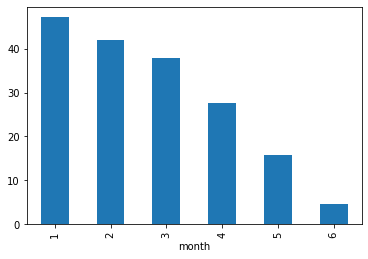

In [15]:
base.groupby('month')['days_late'].mean().plot(kind='bar')

Basic Descriptive Statistics

Holding the month constant in the first moment, will verify monthly effects later

In [16]:
groupavgs=base[base['month']==1].groupby(['type_obs']).mean().unstack()
groupmedian=base[base['month']==1].groupby(['type_obs']).median().unstack()
groupstd=base[base['month']==1].groupby(['type_obs']).std().unstack()

Basic Descriptive Statistics Time_Variant

In [17]:
groupavgs_time=base[base['month']==1].groupby(['days_late','type_obs']).mean().unstack()
groupmedian_time=base[base['month']==1].groupby(['days_late','type_obs']).median().unstack()
groupstd_time=base[base['month']==1].groupby(['days_late','type_obs']).std().unstack()

There are some significant differences on the averages

In [18]:
groupavgs.unstack()

type_obs,both,bureau_1,bureau_2,control
days_late,50.069413,47.925906,46.829644,43.678485
bureau_1,0.012326,0.013348,0.000000,0.000000
bureau_2,0.012326,0.000000,0.012889,0.000000
late_payments,11.248784,11.345682,12.244326,11.663636
std_revolving_balance_30,18.573467,6.435849,8.036985,5.281818
agreement_amount_mean,2447.909836,1655.961844,1558.917647,1358.084813
oustanting_balance_weight_30,115.306195,240.432580,418.868030,229.491212
oustanting_balance_weight_90,14.982160,7.659493,14.760997,6.949697
max_installments_balance_90,13.667532,9.596568,13.456430,7.466061
max_payment_90,8458.070710,4537.308635,4491.979826,3638.087576


Some hold on the median

In [19]:
groupmedian.unstack()

type_obs,both,bureau_1,bureau_2,control
days_late,42.0,39.0,40.0,35.0
bureau_1,0.0,0.0,0.0,0.0
bureau_2,0.0,0.0,0.0,0.0
late_payments,0.0,0.0,10.0,10.0
std_revolving_balance_30,5.0,4.0,4.0,3.0
agreement_amount_mean,2272.0,1461.0,1200.0,1116.0
oustanting_balance_weight_30,70.0,100.0,135.0,71.0
oustanting_balance_weight_90,10.0,4.0,6.0,3.0
max_installments_balance_90,2.0,2.0,2.0,1.0
max_payment_90,2256.0,971.0,1461.0,1810.0


Log Transforms of Variables that can have a large range

In [20]:
base['log_late_balance'] =np.log(base['asset_late_balance']+0.01)
base['log_max_payment_90'] =np.log(base['max_payment_90']+0.01)

C:\Users\Rafael\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
histogram_base=base[['type_obs',
        'log_late_balance',
        'days_late',
        'late_payments',
        'agreement_amount_mean',
        'log_max_payment_90',
        'downpayment_mean',
        'avg_spends',
        'age',
       'log_late_balance']].melt(['type_obs','days_late'])



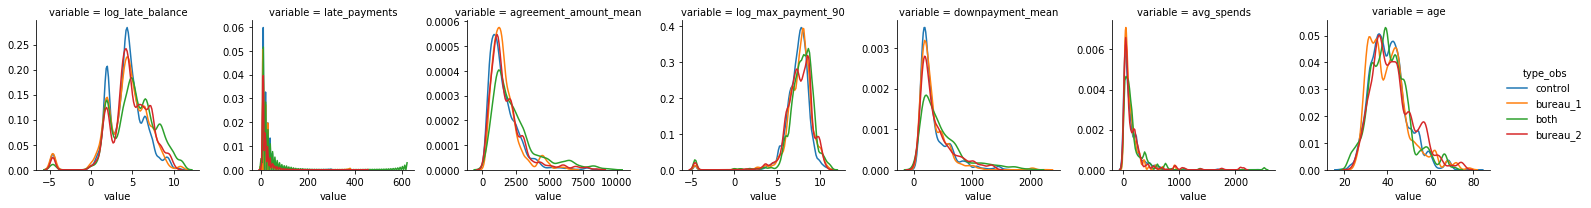

In [22]:
hist_grid = sns.FacetGrid(histogram_base  ,sharex=False,sharey=False,height=3
    
    
    , col='variable', hue="type_obs")
hist_grid= (hist_grid.map(sns.distplot, 'value',hist=False))
hist_grid.add_legend()

C:\Users\Rafael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


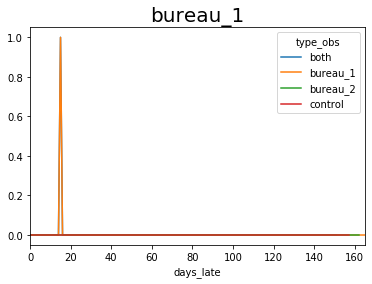

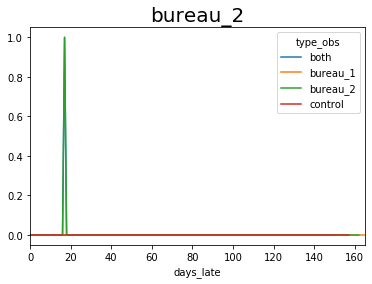

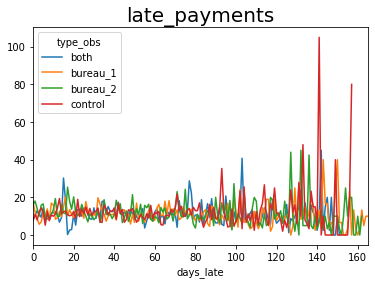

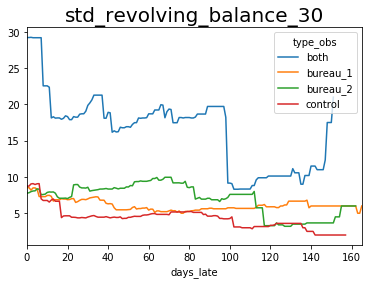

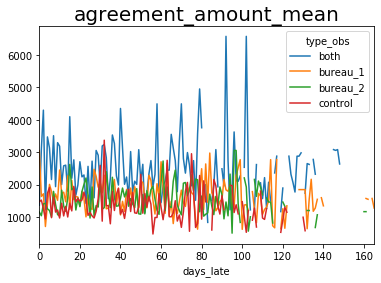

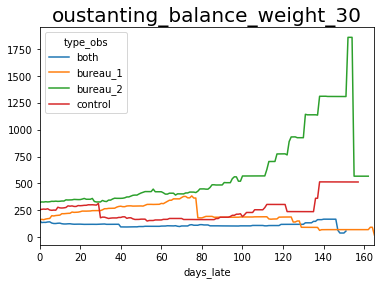

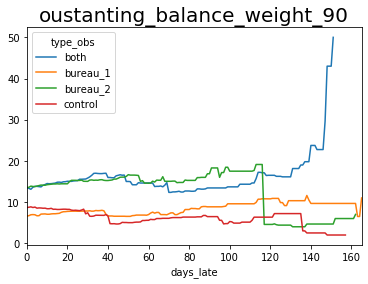

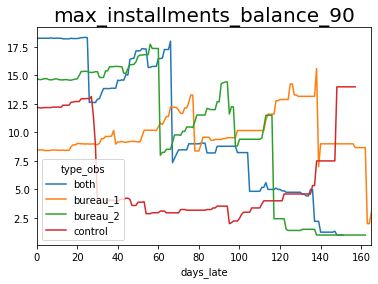

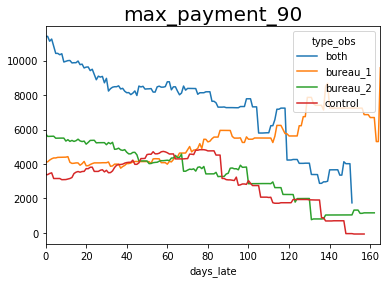

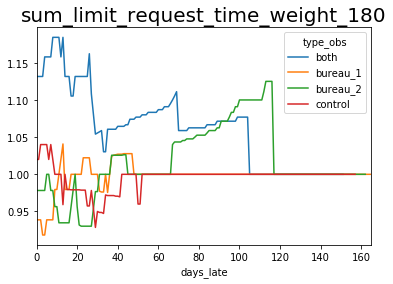

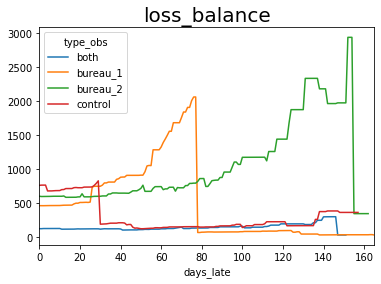

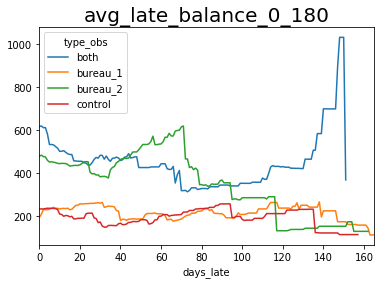

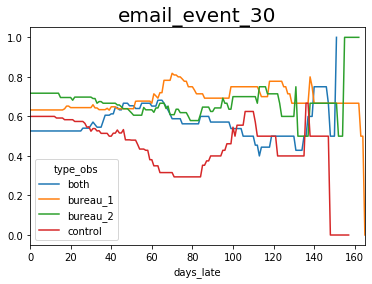

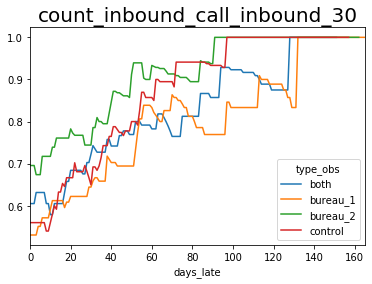

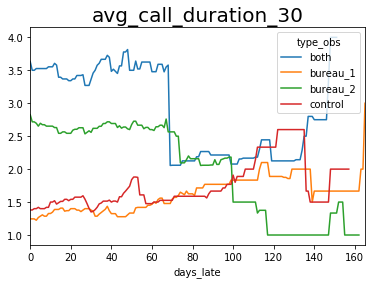

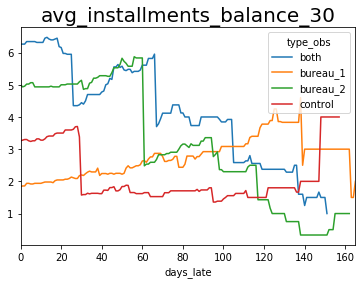

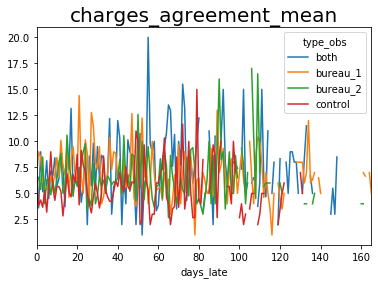

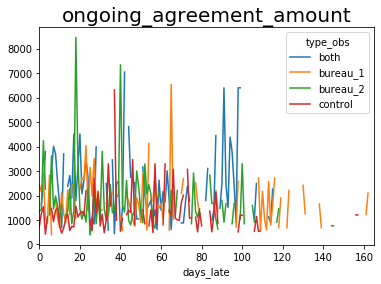

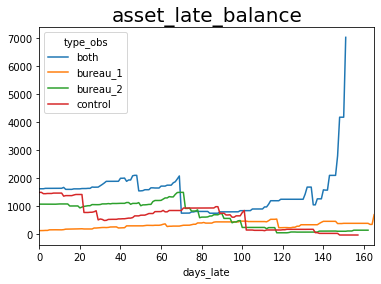

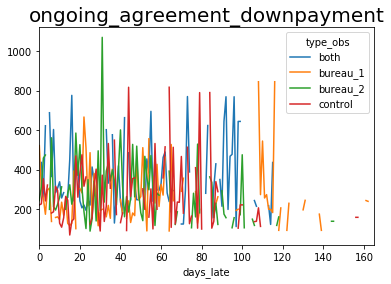

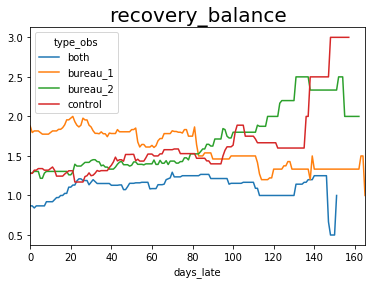

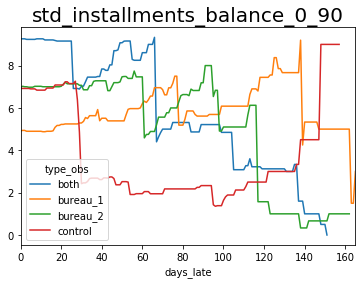

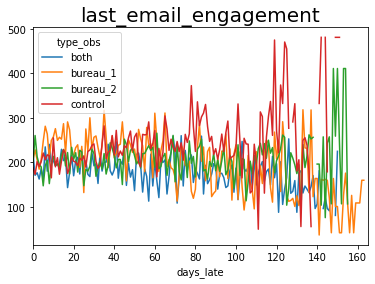

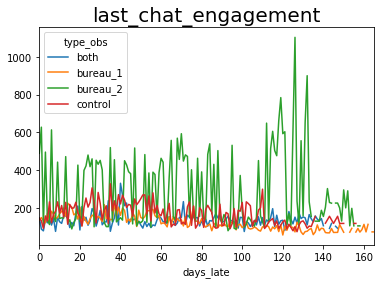

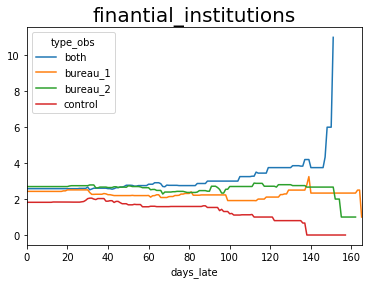

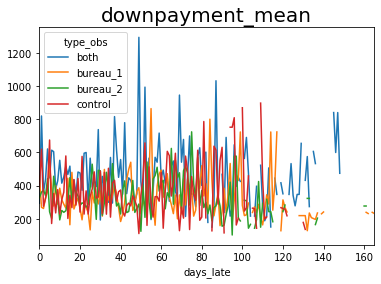

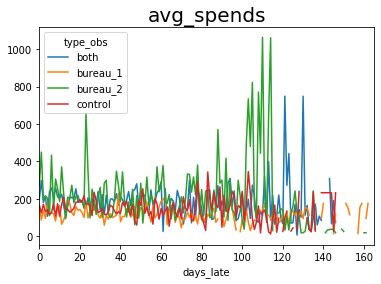

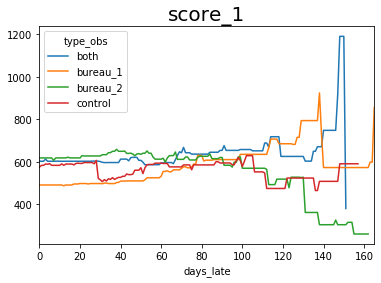

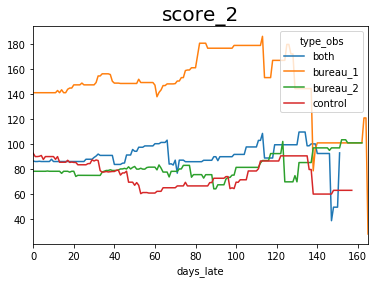

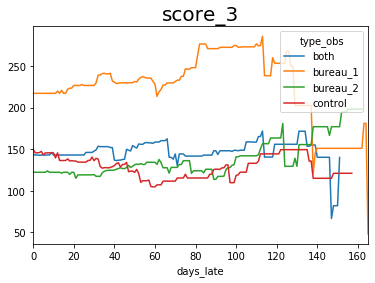

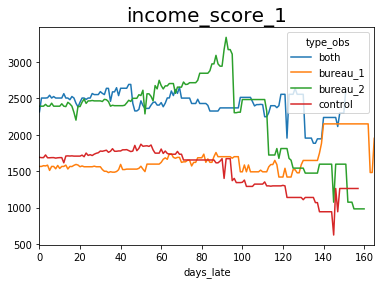

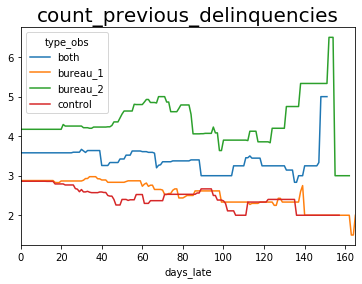

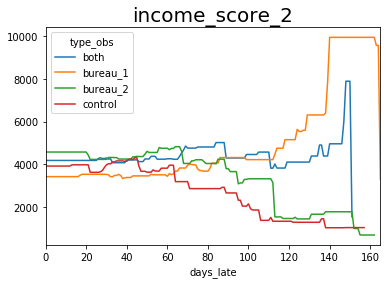

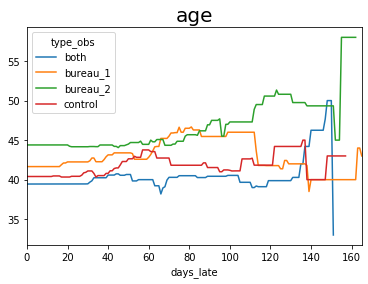

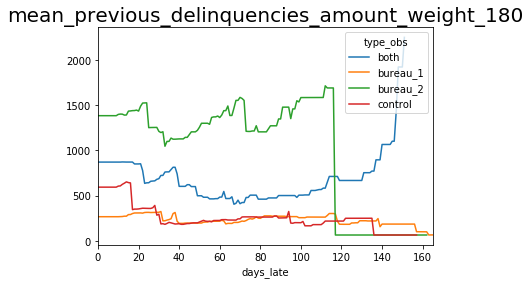

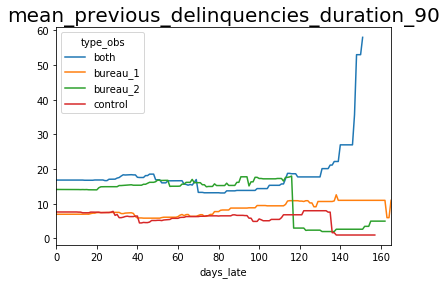

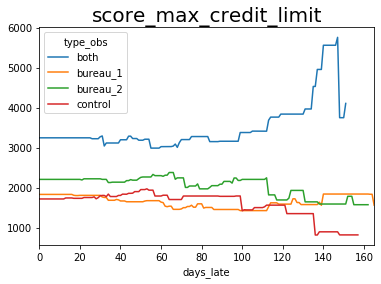

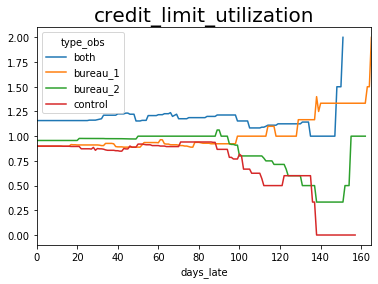

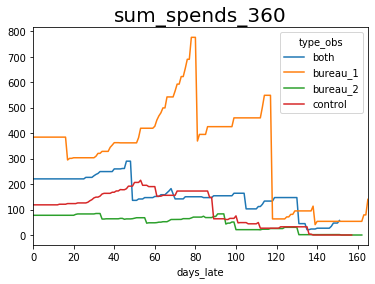

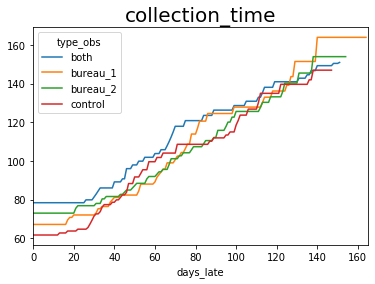

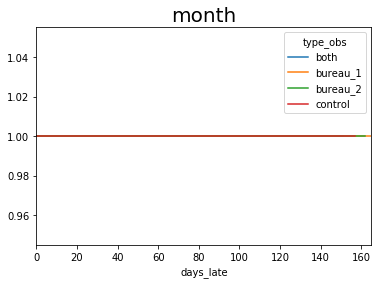

In [23]:
for i in  base.columns:
    try:
        
        avgs=groupavgs_time[i].plot()
        avgs.set_title(i, fontsize=20)  
        avgs.show()
    except:
        continue

# Presence of Outliers,Few Clear Trends

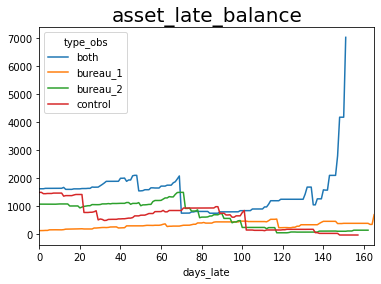

In [24]:
avgs=groupavgs_time['asset_late_balance'].plot()
avgs.set_title('asset_late_balance', fontsize=20)  
avgs

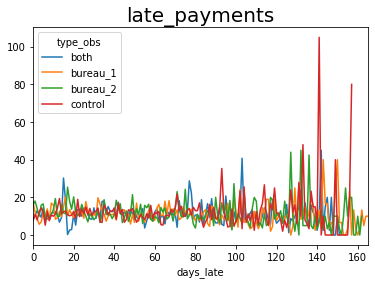

In [25]:
avgs=groupavgs_time['late_payments'].plot()
avgs.set_title('late_payments', fontsize=20)  
avgs

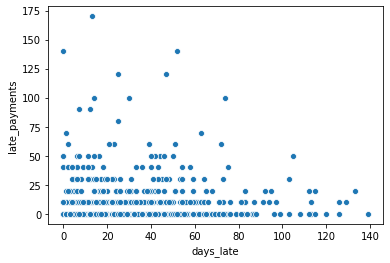

In [26]:
sns.scatterplot(data=base.sample(500),x='days_late',y='late_payments')


In [27]:
#Creates Filters for clients over 15 days
#Not Every client could recieve the treatment only those over 15/17 days. That creates bias
#and needs to be accounted for
max_date_obs=base[base['days_late']>=15].groupby('id')['date'].idxmax().reset_index()
min_date_obs=base[base['id'].isin(max_date_obs['id'])].groupby('id')['date'].idxmin().reset_index()
max_date_obs_0=base[base['days_late']>=0].groupby('id')['date'].idxmax().reset_index()
min_date_obs_0=base[base['id'].isin(max_date_obs['id'])].groupby('id')['date'].idxmin().reset_index()

C:\Users\Rafael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


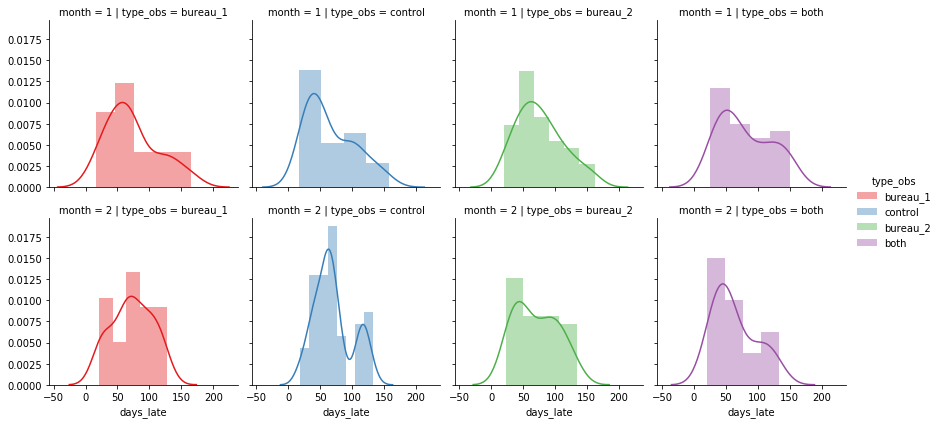

In [28]:
time=base.iloc[ max_date_obs['date']][base['month']<3]   [['type_obs','days_late','month']].fillna(0)
g = sns.FacetGrid(time,row='month', col="type_obs",hue="type_obs", palette="Set1")
g = (g.map(sns.distplot, 'days_late',hist=True))
g.add_legend()

### An alternative hypotesis, maybe the bureau report alters the likehood of a client getting out of colletions

In [29]:
#How many obs of each Class to create a denominator
pars=base.loc[ max_date_obs['date']].groupby(
                                    ['type_obs'])['id'].count()


In [30]:
distinct_colections_base=base.iloc[ max_date_obs['date']  ]
                                  
                               

In [31]:
#creating a cumullative curve of the people that get out of collection conditional on possibly being tretated
distinct_colections_base=distinct_colections_base.groupby(['type_obs'
                      ,'collection_time'])['id'].count().unstack().T.div(pars)

Text(0.5, 1.0, 'collection_end_probability')

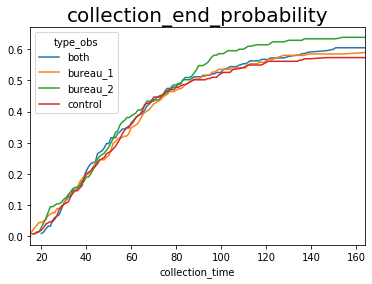

In [32]:
collections=distinct_colections_base.cumsum().fillna(method='ffill').plot()
collections.set_title('collection_end_probability', fontsize=20) 

#Same idea not holding the possibility of being treated

In [33]:
pars=base.loc[ max_date_obs_0['date']].fillna(0).groupby(['type_obs'])['id'].count()


In [34]:
distinct_colections_base_from_start=base.loc[ max_date_obs_0['date']].groupby(['type_obs'
                                                                       ,'collection_time'])['id'].count().unstack().T

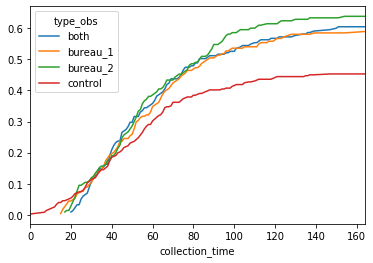

In [35]:
#Not holding the start is deflating the probability the control gets out of collection
distinct_colections_base_from_start.div(pars).cumsum().fillna(method='ffill').plot()

In [36]:
#chaking the monthly variance 
#woth trying fixed effects
base.groupby(['month']).mean()

,days_late,bureau_1,bureau_2,late_payments,std_revolving_balance_30,agreement_amount_mean,oustanting_balance_weight_30,oustanting_balance_weight_90,max_installments_balance_90,max_payment_90,sum_limit_request_time_weight_180,loss_balance,avg_late_balance_0_180,email_event_30,count_inbound_call_inbound_30,avg_call_duration_30,avg_installments_balance_30,charges_agreement_mean,ongoing_agreement_amount,asset_late_balance,ongoing_agreement_downpayment,recovery_balance,std_installments_balance_0_90,last_email_engagement,last_chat_engagement,finantial_institutions,downpayment_mean,avg_spends,score_1,score_2,score_3,income_score_1,count_previous_delinquencies,income_score_2,age,mean_previous_delinquencies_amount_weight_180,mean_previous_delinquencies_duration_90,score_max_credit_limit,credit_limit_utilization,sum_spends_360,collection_time,log_late_balance,log_max_payment_90
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,47.094913,0.006386,0.006166,11.636203,9.322616,1736.045516,256.212141,11.005212,11.012993,5194.909858,1.016443,507.995963,323.396095,0.607062,0.763048,2.128973,3.496660,6.685895,1812.419220,891.166997,303.002786,1.437422,5.927182,211.033733,189.833673,2.357043,365.029743,169.667958,583.451774,100.611029,160.779414,2039.853388,3.297732,3960.629809,42.420539,637.267269,11.228731,2189.220876,0.974015,194.084930,87.862165,4.147999,7.093318
2,41.963468,0.006391,0.005873,11.683220,6.501770,1782.582638,270.520339,9.352794,11.026514,3954.187754,1.033509,396.058122,367.514552,0.557216,0.889887,2.227654,2.616634,7.042293,1713.813205,846.971500,292.895330,1.602815,5.816478,240.411819,150.086672,2.355039,384.196439,144.342025,532.631095,94.809127,152.336023,2081.064180,3.483634,3956.739934,40.188876,455.992055,9.364712,2103.865446,0.917178,276.187754,72.678466,4.525218,7.634635
3,37.905031,0.007121,0.007740,11.383901,6.330495,1877.893482,235.200697,12.198375,7.858746,3718.503715,1.004799,643.229567,401.509907,0.544969,0.925697,2.293111,2.531037,7.940175,1815.310136,1222.101393,289.285930,1.476935,4.405805,261.590871,119.605388,2.380960,365.714494,133.537266,589.017082,101.382638,160.465719,1876.573787,3.767647,4193.488583,40.690635,516.838854,12.755882,2361.920124,0.967260,144.546749,62.835740,4.871560,7.685817
4,27.529191,0.009279,0.009487,11.165555,7.548165,2002.149128,282.021163,10.149291,14.646789,3702.061197,1.010738,384.961426,408.689220,0.551293,0.970392,2.341743,3.574229,7.275016,1807.369835,896.467160,301.520661,1.686301,7.298999,306.014351,130.052375,2.158465,384.386701,151.046218,556.532608,98.664922,159.137339,2064.652261,3.452877,4842.124700,40.741868,963.016576,11.705692,2267.383757,0.911176,230.725188,42.980251,4.600561,7.705476
5,15.901536,0.017525,0.014815,11.922313,6.073351,1926.458333,465.408130,10.213369,15.520687,3857.446432,1.013008,919.771093,300.125384,0.560795,0.962240,2.246974,2.746522,7.088964,1749.760870,1214.397109,284.369565,1.425836,7.038121,240.150310,130.461538,2.576152,385.689189,171.966292,586.140917,92.554791,149.298678,1977.140579,3.508220,4473.669015,42.046432,467.652575,11.529539,2420.757362,0.912376,209.368564,28.228482,4.977512,7.734382
6,4.689855,0.000000,0.000000,9.898551,6.328986,1983.830189,129.031884,10.094203,31.897101,4308.257971,1.000000,105.281159,357.240580,0.628986,0.986957,2.378261,6.278261,6.867925,1945.844444,863.040580,299.111111,1.253623,13.482609,217.684073,95.857143,2.334783,376.415094,244.244635,562.180495,88.464338,142.797671,2012.698972,3.311594,5222.631884,40.698551,429.197101,10.705797,2402.905797,1.015942,85.149275,8.181818,5.128346,7.965443


Text(0.5, 1, 'Average of Agreemet amount')

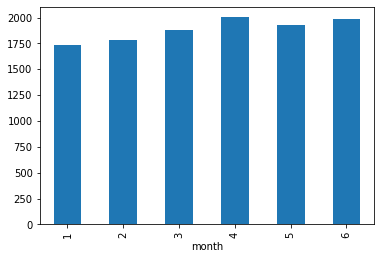

In [37]:
base.groupby(['month'])['agreement_amount_mean'].mean().plot(kind='bar')
collections.set_title('Average of Agreemet amount', fontsize=20) 

Text(0.5, 1, 'Average Credit Limit')

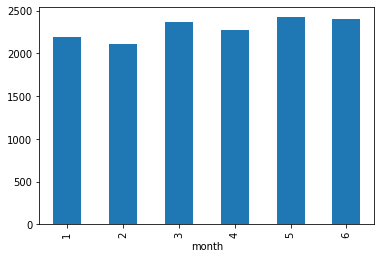

In [38]:
base.groupby(['month'])['score_max_credit_limit'].mean().plot(kind='bar')
collections.set_title('Average Credit Limit', fontsize=20) 

### Hypotesis, reports to the bureaus change the probability of repayment ->logistic model with interaction effects, controls and  a fixed time windows

### There is a need to discretize time,because there is an aspect of survival analysis.Not every observation had the chance to be 90 days old

### The problem formulation is as such, given that the observations could have recieved the treatment, (where at least 17 days overdue), and given the time of the database could be observed to at least 90 days.
### In other words whats the probability that the  m1over17 observations turn into 90days late given the treatments over the whole lifecycle
### I choose 90 days because there appears to be where the probabilty diverges if it does

In [39]:
print(base['date'].min())
print(base['date'].max())

2017-01-01 00:00:00
2017-06-15 00:00:00


In [40]:
base['date'].max()-pd.Timedelta('90days')

Timestamp('2017-03-17 00:00:00')

In [41]:
logistic_reference=base[(base['days_late']==17) & (base['collections_start']<'2017-03-17')].drop(['days_late'],axis=1)

In [42]:
logistic_reference['logistic_target']=0
logistic_reference.loc[logistic_reference['collection_time']<=90  , 'logistic_target'] = 1
logistic_reference.loc[logistic_reference['type_obs'].isin(['both','bureau_1']) ,  'bureau_1']=1
logistic_reference.loc[logistic_reference['type_obs'].isin(['both','bureau_2']) ,  'bureau_2']=1

In [43]:
logistic_reference.groupby(['logistic_target']) ['id'] .count()

logistic_target
0    137
1    308
Name: id, dtype: int64

In [44]:
def cut(x):
    cuts=pd.qcut(x,10,duplicates='drop')
    return cuts

In [45]:
base_discreta=logistic_reference.select_dtypes(include='number').apply(cut)

# Two ways to create a feel for the logistic, discretize variables and univariare regression

In [46]:
base_discreta['logistic_target']=logistic_reference['logistic_target']

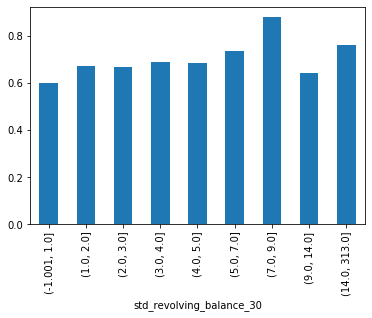

In [47]:
x=base_discreta.groupby( [ 'std_revolving_balance_30','logistic_target'])['logistic_target'].count().unstack()
x.div(x.sum(axis=1),axis='index' )[1].plot(kind='bar')
plt.show()

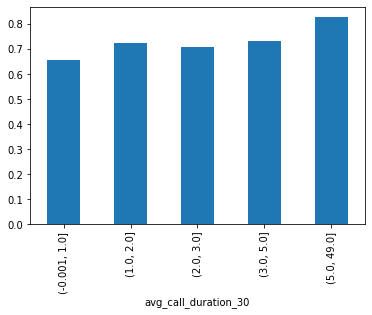

In [48]:
x=base_discreta.groupby( [ 'avg_call_duration_30','logistic_target'])['logistic_target'].count().unstack()
x.div(x.sum(axis=1),axis='index' )[1].plot(kind='bar')
plt.show()

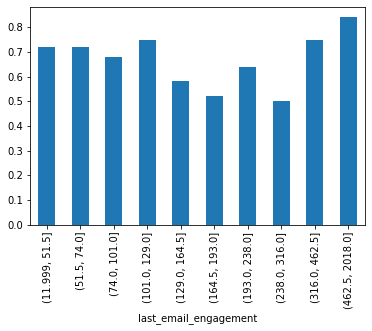

In [49]:
x=base_discreta.groupby( [ 'last_email_engagement','logistic_target'])['logistic_target'].count().unstack()
x.div(x.sum(axis=1),axis='index' )[1].plot(kind='bar')
plt.show()

## Will use significance Since Nobs and columns is low.Otherwise would add a effect size criterion

In [50]:
dic_pvalues={}
for i in  logistic_reference.columns:
    formula =0
    formula ='logistic_target~'+i
    try:
        dic_pvalues[i]=logit(formula      
                        ,data=logistic_reference.fillna(0)).fit().pvalues[i]
    except:
        continue
    

         Current function value: 0.000000
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.616796
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616964
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617266
         Iterations 5


C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.615794
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614878
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616714
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616280
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613368
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616228
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616279
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617336
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617301
         Iterations 5
Optimization terminat

In [51]:
series_pvalues=pd.Series(dic_pvalues).sort_values()
series_pvalues=series_pvalues [series_pvalues.index!='collection_time']

In [52]:
series_pvalues

avg_call_duration_30                             0.088725
downpayment_mean                                 0.092153
age                                              0.107304
log_late_balance                                 0.107967
max_installments_balance_90                      0.113368
income_score_1                                   0.117934
std_installments_balance_0_90                    0.123379
agreement_amount_mean                            0.161672
mean_previous_delinquencies_duration_90          0.179587
ongoing_agreement_downpayment                    0.189160
email_event_30                                   0.189988
std_revolving_balance_30                         0.262628
avg_installments_balance_30                      0.270351
recovery_balance                                 0.301648
count_previous_delinquencies                     0.303409
max_payment_90                                   0.304669
sum_limit_request_time_weight_180                0.325224
oustanting_bal

In [53]:
from_discrete='+'.join(['std_revolving_balance_30','last_email_engagement'])

In [54]:
from_probs='+'.join(series_pvalues[series_pvalues<0.25].index)

In [55]:
formula='logistic_target~'+'+'.join([from_discrete,from_probs])

In [56]:
logit(formula
      ,data=logistic_reference.fillna(0)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.586486
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        logistic_target   No. Observations:                  445
Model:                          Logit   Df Residuals:                      431
Method:                           MLE   Df Model:                           13
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:                 0.05004
Time:                        03:51:19   Log-Likelihood:                -260.99
converged:                       True   LL-Null:                       -274.73
Covariance Type:            nonrobust   LLR p-value:                   0.01063
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.7894      0.579      1.364      0.173      -0.345       1.924
std_revolving_balance_30                   -0.0109      0.007     -1.558      0.119      -0.025       0.003
last_email_engagement                       0.0010      0.001      1.678      0.093      -0.000       0.002
avg_call_duration_30                        0.0586      0.047      1.249      0.212      -0.033       0.151
downpayment_mean                            0.0017      0.002      1.151      0.250      -0.001       0.005
age                                        -0.0130      0.012     -1.092      0.275      -0.036       0.010
log_late_balance                            0.0806      0.041      1.960      0.050   -1.19e-05       0.161
max_installments_balance_90                 0.0273      0.030      0.923      0.356      -0.031       0.085
income_score_1                             -0.0001   7.54e-05     -1.852      0.064      -0.000    8.13e-06
std_installments_balance_0_90              -0.0407      0.058     -0.701      0.483      -0.154       0.073
agreement_amount_mean                   -2.264e-05      0.000     -0.085      0.933      -0.001       0.001
mean_previous_delinquencies_duration_90     0.0012      0.007      0.177      0.860      -0.012       0.014
ongoing_agreement_downpayment              -0.0017      0.002     -1.053      0.293      -0.005       0.001
email_event_30                              0.4716      0.233      2.028      0.043       0.016       0.927
===========================================================================================================
"""

In [57]:
formula2=formula+'+bureau_1+bureau_2+bureau_1*bureau_2'

In [58]:
logistic_0=logit(formula2
          ,data=logistic_reference.fillna(0)).fit()

Optimization terminated successfully.
         Current function value: 0.584132
         Iterations 7


In [59]:
#the diagnostics don't look good.
logistic_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        logistic_target   No. Observations:                  445
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                           16
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:                 0.05386
Time:                        03:51:19   Log-Likelihood:                -259.94
converged:                       True   LL-Null:                       -274.73
Covariance Type:            nonrobust   LLR p-value:                   0.02023
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.8901      0.591      1.505      0.132      -0.269       2.049
std_revolving_balance_30                   -0.0103      0.007     -1.490      0.136      -0.024       0.003
last_email_engagement                       0.0011      0.001      1.782      0.075      -0.000       0.002
avg_call_duration_30                        0.0592      0.048      1.246      0.213      -0.034       0.152
downpayment_mean                            0.0018      0.001      1.198      0.231      -0.001       0.005
age                                        -0.0106      0.012     -0.883      0.377      -0.034       0.013
log_late_balance                            0.0816      0.041      1.974      0.048       0.001       0.163
max_installments_balance_90                 0.0254      0.029      0.867      0.386      -0.032       0.083
income_score_1                             -0.0001   7.61e-05     -1.841      0.066      -0.000    9.07e-06
std_installments_balance_0_90              -0.0366      0.058     -0.633      0.527      -0.150       0.077
agreement_amount_mean                    -1.42e-05      0.000     -0.053      0.958      -0.001       0.001
mean_previous_delinquencies_duration_90     0.0020      0.007      0.299      0.765      -0.011       0.015
ongoing_agreement_downpayment              -0.0017      0.002     -1.050      0.294      -0.005       0.002
email_event_30                              0.4983      0.235      2.124      0.034       0.038       0.958
bureau_1                                   -0.3371      0.296     -1.137      0.256      -0.918       0.244
bureau_2                                   -0.3869      0.299     -1.294      0.196      -0.973       0.199
bureau_1:bureau_2                           0.4196      0.435      0.965      0.334      -0.433       1.272
===========================================================================================================
"""

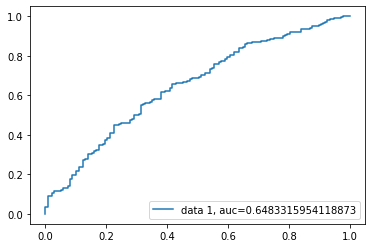

In [60]:
#Weak Discrimanory Power even on test
y_pred= logistic_0.predict(logistic_reference.fillna(0))
fpr, tpr, _ = metrics.roc_curve(logistic_reference['logistic_target'],  y_pred)
auc = metrics.roc_auc_score(logistic_reference['logistic_target'], y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)
plt.show()

In [61]:
#desn't reject the hypotesis that both are null
logistic_0.wald_test('bureau_2=0,bureau_1=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.00274099]], p-value=0.36737561042920225, df_denom=2>

In [62]:
logistic_0.wald_test('bureau_2=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.67446864]], p-value=0.19566106492688543, df_denom=1>

In [63]:
logistic_0.wald_test('bureau_1=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[1.29294835]], p-value=0.255505316944901, df_denom=1>

In [64]:
logistic_reference=(logistic_reference
                    .join(pd.get_dummies(logistic_reference['month'],prefix='month')))

In [65]:
formula_3=formula2.replace("+downpayment_mean","").replace('+agreement_amount_mean','')+'+month_1+month_2'

In [66]:
logistic_1=logit(formula_3
      ,data=logistic_reference.fillna(0)).fit()

Optimization terminated successfully.
         Current function value: 0.587856
         Iterations 7


In [67]:
#Fixed Monthly effects
logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        logistic_target   No. Observations:                  445
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                           16
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:                 0.04782
Time:                        03:51:20   Log-Likelihood:                -261.60
converged:                       True   LL-Null:                       -274.73
Covariance Type:            nonrobust   LLR p-value:                   0.05024
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.8463      0.614      1.379      0.168      -0.357       2.049
std_revolving_balance_30                   -0.0110      0.007     -1.565      0.118      -0.025       0.003
last_email_engagement                       0.0011      0.001      1.762      0.078      -0.000       0.002
avg_call_duration_30                        0.0648      0.050      1.300      0.194      -0.033       0.162
age                                        -0.0132      0.012     -1.100      0.271      -0.037       0.010
log_late_balance                            0.0743      0.042      1.790      0.074      -0.007       0.156
max_installments_balance_90                 0.0255      0.030      0.854      0.393      -0.033       0.084
income_score_1                             -0.0001   7.59e-05     -1.826      0.068      -0.000    1.02e-05
std_installments_balance_0_90              -0.0371      0.059     -0.630      0.529      -0.153       0.078
mean_previous_delinquencies_duration_90     0.0034      0.007      0.512      0.609      -0.010       0.016
ongoing_agreement_downpayment              -0.0015      0.002     -0.923      0.356      -0.005       0.002
email_event_30                              0.4699      0.233      2.014      0.044       0.012       0.927
bureau_1                                   -0.3068      0.295     -1.039      0.299      -0.885       0.272
bureau_2                                   -0.3403      0.298     -1.143      0.253      -0.924       0.243
bureau_1:bureau_2                           0.3954      0.434      0.911      0.362      -0.455       1.246
month_1                                     0.2637      0.281      0.937      0.349      -0.288       0.815
month_2                                     0.2821      0.282      1.001      0.317      -0.270       0.834
===========================================================================================================
"""

In [68]:
logistic_2=logit('logistic_target~bureau_1+bureau_2+bureau_1*bureau_2'
      ,data=logistic_reference.fillna(0)).fit()

Optimization terminated successfully.
         Current function value: 0.615837
         Iterations 5


In [69]:
logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        logistic_target   No. Observations:                  445
Model:                          Logit   Df Residuals:                      441
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Mar 2020   Pseudo R-squ.:                0.002503
Time:                        03:51:20   Log-Likelihood:                -274.05
converged:                       True   LL-Null:                       -274.73
Covariance Type:            nonrobust   LLR p-value:                    0.7114
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0062      0.200      5.021      0.000       0.613       1.399
bureau_1             -0.2857      0.285     -1.001      0.317      -0.845       0.274
bureau_2             -0.2604      0.283     -0.921      0.357      -0.815       0.294
bureau_1:bureau_2     0.2818      0.413      0.683      0.495      -0.527       1.091
=====================================================================================
"""

In [70]:
logistic_0.wald_test('bureau_2=0,bureau_1=0,bureau_1:bureau_2=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.0539866]], p-value=0.5612775245035684, df_denom=3>

## With multiple model specifications, i could not reject the hypothesis that the bureaus have no impact on the likehood of repayment 

## Another specification could be that of those making late payments bureau reports increase 
## value paid

#Noisy, daily payments and time series behavior

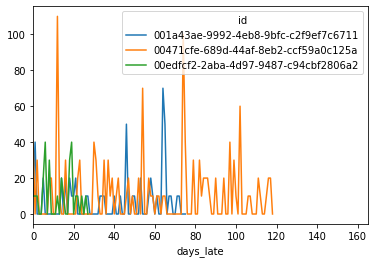

In [71]:
base.pivot(index='days_late',columns='id',values='late_payments').iloc[:,:3].plot()

#Doesn't look promissing

C:\Users\Rafael\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


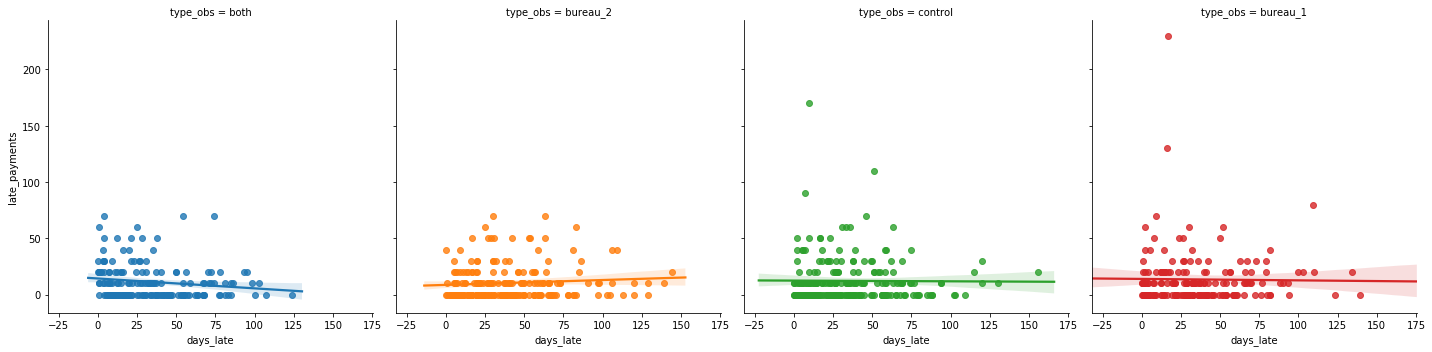

In [72]:
(sns.FacetGrid(base.reset_index().sample(800), col="type_obs",hue="type_obs", size=5)
             .map(sns.regplot, "days_late", "late_payments"))

Low correlations

In [73]:
(abs(base.corr().replace(1,0))
            [['late_payments']]
            .sort_values(['late_payments'],ascending=False)
             .head())

,late_payments
bureau_1,0.025403
ongoing_agreement_amount,0.015047
age,0.012278
collection_time,0.011676
last_email_engagement,0.009576


Does the diferences between groups change?

In [74]:
diff=base.groupby(['type_obs','days_late'])['late_payments'].mean().unstack().T

Maybe in the day after?

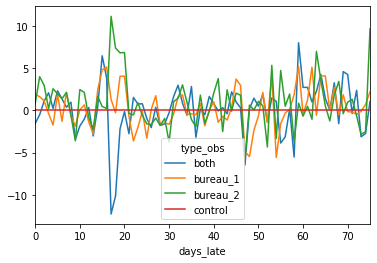

In [75]:
diff.sub(diff['control'],axis=0)[:-90] .plot()

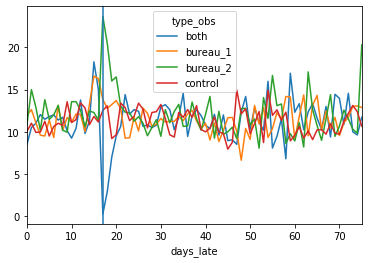

In [76]:
diff[:-90].plot()

plt.axvline(17, 0,5)


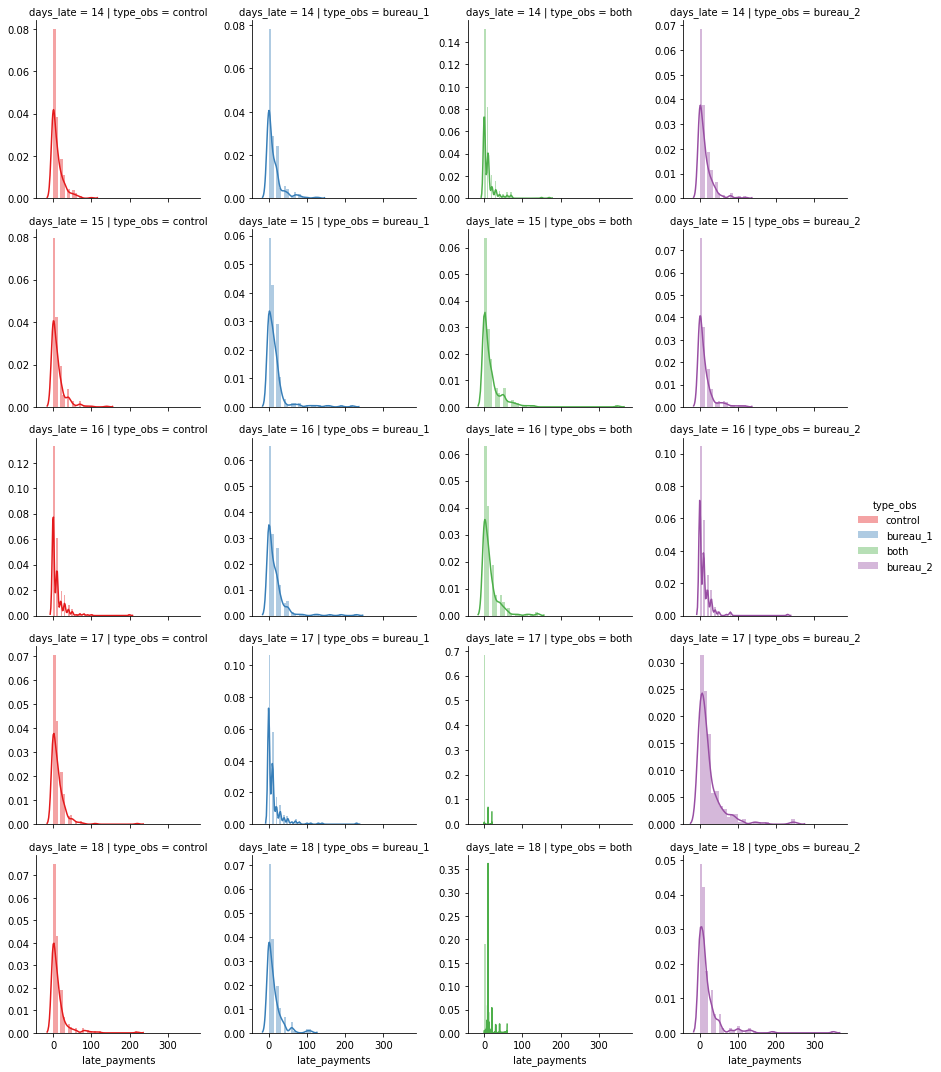

In [77]:
#Creates scatterplots around the days o the change
time=base[(base['days_late']>=14) &(base['days_late']<=18)]   [['type_obs','days_late','late_payments']]
g = sns.FacetGrid(time,row='days_late', col="type_obs",hue="type_obs", palette="Set1",sharey=False)
g = (g.map(sns.distplot, 'late_payments',hist=True))
g.add_legend()

In [78]:
#Creating Reliable Marks every N days so i can create groups later
base['days_late_1']=base['days_late']+1
base['days_late_range']=np.ceil(base['days_late_1']/5)

#Bureau TIme is a flag for every Id after they recieved the bureau report
base['bureau_1_time']=0
base['bureau_2_time']=0
base.loc[(base['id'].isin(bureau_1)) & (base['days_late']>=15),'bureau_1_time']=1
base.loc[(base['id'].isin(bureau_2)) & (base['days_late']>=17),'bureau_2_time']=1

In [79]:
#Filters ids that could have recieved the reports >15days late
base_reg1=base[base['id']  .isin(max_date_obs['id'])]
#Groups on the days ranges I created 
base_reg1=base_reg1.groupby(['id','days_late_range']).max()
#For payments sum is a better agg func 
base_reg1['late_payments']=base_reg1.groupby(['id','days_late_range'])['late_payments'].sum()
#filters obs that doesn't have the agretate of at elast 3 days
filtro1=((base_reg1['days_late']/5)% 1)>=0.6

base_reg1=base_reg1[filtro1].reset_index()

Way too many zeros nom normal response

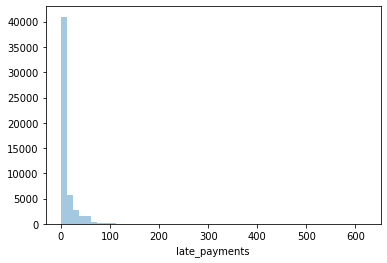

In [80]:
sns.distplot(base['late_payments'],kde=False)

Group By 5 Day Ranges, Max for non groupables and sum for late payments

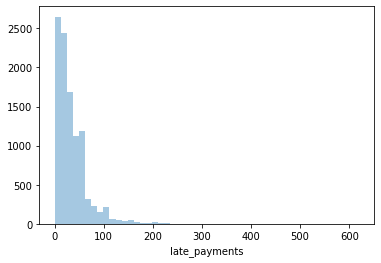

In [81]:
sns.distplot(base_reg1['late_payments'],kde=False)

This is a complex distribuition to deal with

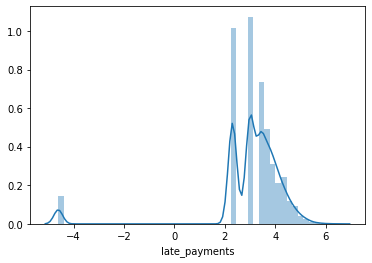

In [82]:
base_reg1['late_payments_log']=np.log(base_reg1['late_payments']+0.01)
sns.distplot(np.log(base_reg1['late_payments']+0.01))

In [83]:
#Creates a column with t-1 values of late payments
base_pay_t0=base_reg1.pivot(index='days_late',values='late_payments',columns='id').fillna(method='ffill').shift(1 ,fill_value=0).stack()
base_pay_t0=base_pay_t0.rename('pay_T0')
base_pay_t0.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40590 entries, 0 to 40589
Data columns (total 3 columns):
days_late    40590 non-null int64
id           40590 non-null object
pay_T0       40590 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 951.5+ KB


In [84]:
base_reg1[['id','days_late']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10327 entries, 0 to 10326
Data columns (total 2 columns):
id           10327 non-null object
days_late    10327 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.5+ KB


In [85]:
base_reg1=base_reg1.merge(base_pay_t0,on=['id','days_late'],how='left')


In [86]:
diff=base.groupby(['type_obs','days_late_range'])['late_payments'].mean().unstack().T

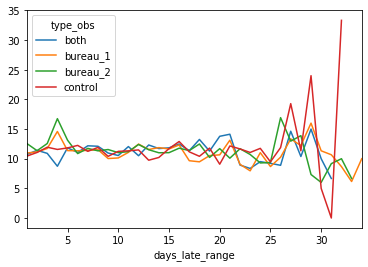

In [87]:
diff.plot()

In [88]:
#base_reg1=base_reg1 [base_reg1['late_payments']!=20]

In [89]:

        mod = smf.glm(formula='''late_payments ~ bureau_1+bureau_2+bureau_1*bureau_2+age''',
                      data=base_reg1.reset_index().fillna(0), family=sm.families.Gamma(link=links.identity()))
        res = mod.fit()
       

C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:273: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)


In [90]:
base_reg1['res']=res.predict(base_reg1)

Hellish qqplot

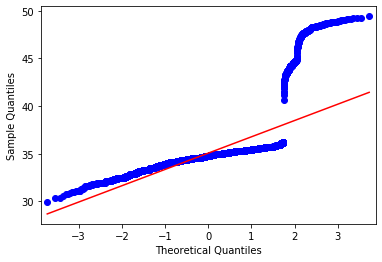

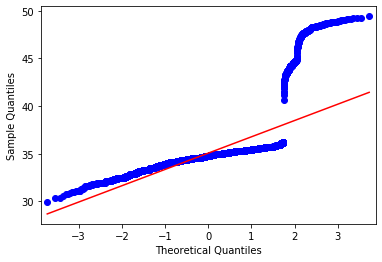

In [91]:
graphics.gofplots.qqplot(res.mu, line='r')

In [92]:
res.summary()

C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:735: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          late_payments   No. Observations:                10327
Model:                            GLM   Df Residuals:                    10322
Model Family:                   Gamma   Df Model:                            4
Link Function:               identity   Scale:                         0.94322
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Wed, 11 Mar 2020   Deviance:                       29047.
Time:                        03:51:57   Pearson chi2:                 9.74e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            38.0809      1.540     24.722      0.000      35.062      41.100
bureau_1              9.0708      2.941      3.084      0.002       3.306      14.836
bureau_2             13.3356      3.249      4.104      0.000       6.967      19.704
bureau_1:bureau_2   -24.6066      4.873     -5.050      0.000     -34.157     -15.056
age                  -0.0833      0.036     -2.307      0.021      -0.154      -0.013
=====================================================================================
"""

Changing the espcification from point to time effect aleviates the problem bus does not create significant coeficients

In [93]:

        mod = smf.glm(formula='''late_payments ~ bureau_1_time  +bureau_2_time     
        +age+ongoing_agreement_amount+last_email_engagement	''',
                      data=base_reg1.reset_index().fillna(0), family=sm.families.Gamma())
        res = mod.fit()
       

C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [94]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          late_payments   No. Observations:                10327
Model:                            GLM   Df Residuals:                    10321
Model Family:                   Gamma   Df Model:                            5
Link Function:          inverse_power   Scale:                         0.94527
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Wed, 11 Mar 2020   Deviance:                       29071.
Time:                        03:51:57   Pearson chi2:                 9.76e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0255      0.001     19.057      0.000       0.023       0.028
bureau_1_time                0.0001      0.001      0.246      0.805      -0.001       0.001
bureau_2_time               -0.0009      0.001     -1.617      0.106      -0.002       0.000
age                       6.766e-05   3.07e-05      2.207      0.027    7.58e-06       0.000
ongoing_agreement_amount  4.155e-07   2.91e-07      1.429      0.153   -1.55e-07    9.85e-07
last_email_engagement     1.407e-06   1.06e-06      1.322      0.186   -6.78e-07    3.49e-06
============================================================================================
"""

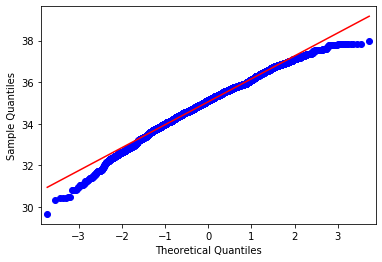

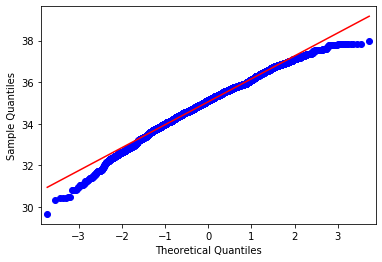

In [95]:
graphics.gofplots.qqplot(res.mu, line='r')

## Handmade solutiuon

In [119]:

diff=base_reg1.groupby(['type_obs','days_late_range'])['late_payments'].sum().unstack().T
diff2=base_reg1.groupby(['type_obs','days_late_range'])['late_payments'].count().unstack().T

In [120]:
diff3=base_reg1.groupby(['type_obs','days_late_range'])['late_payments'].mean().unstack().T

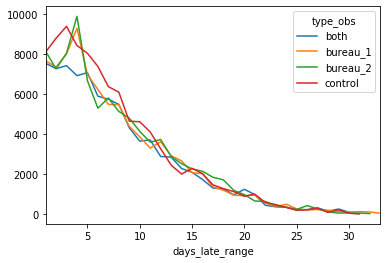

In [121]:
diff.plot()

In [122]:
#Replace the outlier by the time average
conterfactual=pd.DataFrame(diff[diff.index.isin([3,5])].mean()).T
deltas=diff[diff.index.isin([4])]-conterfactual.values
diff_sqd=base.groupby(['type_obs','days_late'])['late_payments'].std().unstack().T

In [124]:
coefs=deltas.div(diff2[diff2.index.isin([4])])

In [117]:
diff[diff.index.isin([4])]=pd.DataFrame(diff[diff.index.isin([3,5])].mean()).T.values

Effect Cleaned

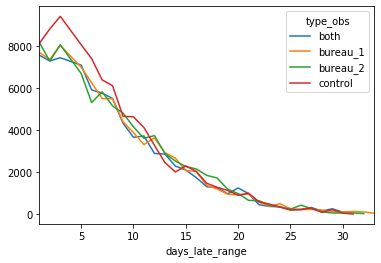

In [118]:
diff.plot()

In [106]:
        mod = smf.ols(formula='''late_payments ~ bureau_1+bureau_2+bureau_1*bureau_2+days_late+type_obs''',
                      data=base_reg1.fillna(0))
        res = mod.fit()

In [125]:
#These numbers roughtly correspond with de coeficientes in the table bellow  bureau_1:bureau_2=-25.2013  because It has to anull  
#9.7336+12.3151+  and represent the effect of the combination
coefs

type_obs,both,bureau_1,bureau_2,control
days_late_range,,,,
4.0,-1.525822,8.490566,12.246377,-1.182573


In [107]:
   res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          late_payments   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.190
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.31e-08
Time:                        03:51:59   Log-Likelihood:                -51101.
No. Observations:               10327   AIC:                         1.022e+05
Df Residuals:                   10319   BIC:                         1.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               35.8893      0.866     41.455      0.000      34.192      37.586
type_obs[T.bureau_1]    -1.5536      1.010     -1.538      0.124      -3.534       0.427
type_obs[T.bureau_2]    -0.1770      1.017     -0.174      0.862      -2.170       1.816
type_obs[T.control]     -1.3646      0.971     -1.405      0.160      -3.268       0.539
bureau_1                 9.7336      2.460      3.957      0.000       4.912      14.555
bureau_2                12.3151      2.490      4.946      0.000       7.435      17.196
bureau_1:bureau_2      -25.2013      4.264     -5.910      0.000     -33.560     -16.843
days_late               -0.0106      0.012     -0.902      0.367      -0.034       0.012
==============================================================================
Omnibus:                     8610.738   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381754.701
Skew:                           3.746   Prob(JB):                         0.00
Kurtosis:                      31.828   Cond. No.                         688.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As an addendum, I thought random effects or Diff and Diff would be the best solution, I was Wrong

In [108]:
md = smf.mixedlm("late_payments_log ~ bureau_1+bureau_2+bureau_1*bureau_2+age+days_late+ongoing_agreement_amount+pay_T0",base_reg1.fillna(0), groups=base_reg1["id"])

mdf = md.fit()

mdf.summary()

C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anacond

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:              MixedLM  Dependent Variable:  late_payments_log
No. Observations:   10327    Method:              REML             
No. Groups:         902      Scale:               2.4322           
Min. group size:    3        Likelihood:          -19326.1190      
Max. group size:    33       Converged:           No               
Mean group size:    11.4                                           
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 3.133    0.080 38.922 0.000  2.975  3.291
bureau_1                  0.254    0.109  2.321 0.020  0.039  0.468
bureau_2                  0.457    0.111  4.133 0.000  0.240  0.674
bureau_1:bureau_2        -1.323    0.188 -7.032 0.000 -1.691 -0.954
age                      -0.002    0.002 -1.117 0.264 -0.006  0.002
days_late                -0.000    0.001 -0.127 0.899 -0.001  0.001
ongoing_agreement_amount -0.000    0.000 -1.141 0.254 -0.000  0.000
pay_T0                    0.000    0.000  0.161 0.872 -0.001  0.001
Group Var                 0.026    0.009                           
===================================================================

"""

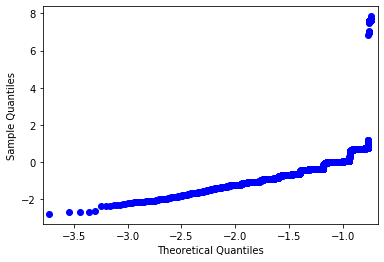

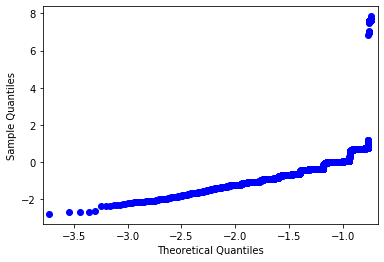

In [109]:
graphics.gofplots.qqplot((mdf.predict(base_reg1)-base_reg1['late_payments_log']))

In [110]:
base_reg1['res']=res.predict(base_reg1)

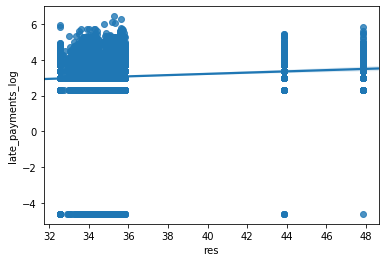

In [111]:
sns.regplot(data=base_reg1[['res','late_payments_log']],x='res',y='late_payments_log')

# The coeficients are similarly  the same size os the standard OLS ,but the especification still bad.

In [112]:
md = smf.mixedlm("late_payments ~ bureau_1+bureau_2+bureau_1*bureau_2+age+days_late+ongoing_agreement_amount+pay_T0",base_reg1.fillna(0), groups=base_reg1["id"])

mdf = md.fit()

mdf.summary()

C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\Rafael\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Rafael\Anacond

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM    Dependent Variable:    late_payments
No. Observations:      10327      Method:                REML         
No. Groups:            902        Scale:                 1153.2176    
Min. group size:       3          Likelihood:            -51116.7097  
Max. group size:       33         Converged:             No           
Mean group size:       11.4                                           
----------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept                 38.847    1.759 22.083 0.000  35.399  42.295
bureau_1                   9.011    2.381  3.785 0.000   4.345  13.677
bureau_2                  13.066    2.409  5.424 0.000   8.345  17.788
bureau_1:bureau_2        -24.349    4.096 -5.945 0.000 -32.377 -16.321
age                       -0.080    0.040 -2.011 0.044  -0.157  -0.002
days_late                 -0.010    0.012 -0.819 0.413  -0.034   0.014
ongoing_agreement_amount  -0.000    0.000 -1.192 0.233  -0.001   0.000
pay_T0                    -0.011    0.011 -1.080 0.280  -0.032   0.009
Group Var                 12.438    0.198                             
======================================================================

"""

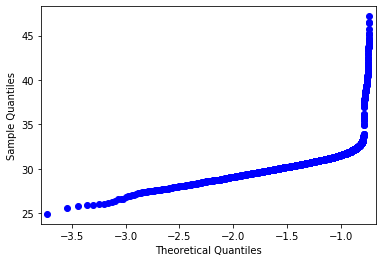

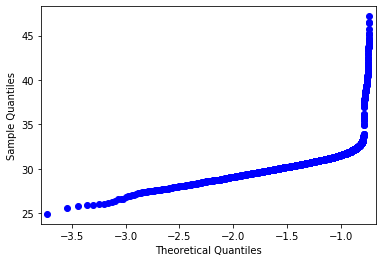

In [113]:
graphics.gofplots.qqplot((mdf.predict(base_reg1)-base_reg1['late_payments_log']))